In [359]:
from IPython.display import HTML

HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [360]:
import os
import sys
import numpy as np
import pandas as pd
import subprocess
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import itertools
from susipop import filter
from susipop import reader
# from IPython.html.widgets import FloatProgress
# from IPython.display import display
# import ipywidgets as widgets
import scipy.stats as ss

%matplotlib notebook

import plotly
import susipop as sp
import pylab

import warnings
warnings.filterwarnings('ignore')

In [361]:
def get_folder_list():
    f = next(os.walk('.'))[1]
    return f
def sort_data(x,y):
    lists = sorted(itertools.izip(*[x, y]))
    new_x, new_y = list(itertools.izip(*lists))
    return new_x, new_y


In [362]:
def compare(phival,ydvals):
    plt.style.use('seaborn-deep')
    l = []
    phival = "phi"+str(phival)
    for f in get_folder_list():
        try:
            if f.split("_")[1] == phival:
                l.append(f)
        except:
            continue
    nufiles = [f+"/result/nu_t.dat" for f in l]
    plt.figure()
    minshear = 100000
    for f in np.sort(nufiles):
        try:
            db = pd.read_csv(f)
            nu = db[db.columns[2]]
            nu_rel = db[db.columns[4]]
            t = db[db.columns[1]]
            shearrate = float(f.split("_")[2].split("/")[0].split("yd")[1])
            if shearrate in ydvals: 
                shear = t*shearrate
                if minshear > shear.max(): minshear = shear.max()
                plt.plot(shear,nu,label=str(shearrate))
        except:
            continue
    plt.legend(loc="best")
    plt.title(f.split("/")[0].split("yd")[0])
    plt.yscale("log")
    plt.xlabel("strain")
    plt.ylabel("viscosity Pa.s")
#     plt.xlim([0,minshear])
    name = "comparison_viscosity_" + str(phival)+ '_'.join([str(i) for i in ydvals])
    plt.savefig(name)

<IPython.core.display.Javascript object>


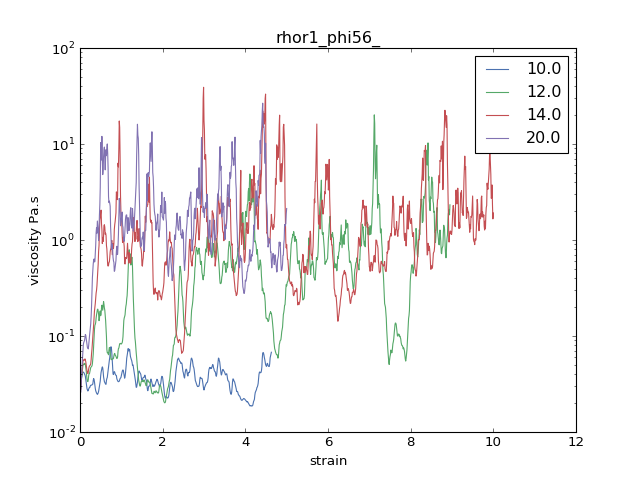

<IPython.core.display.Javascript object>


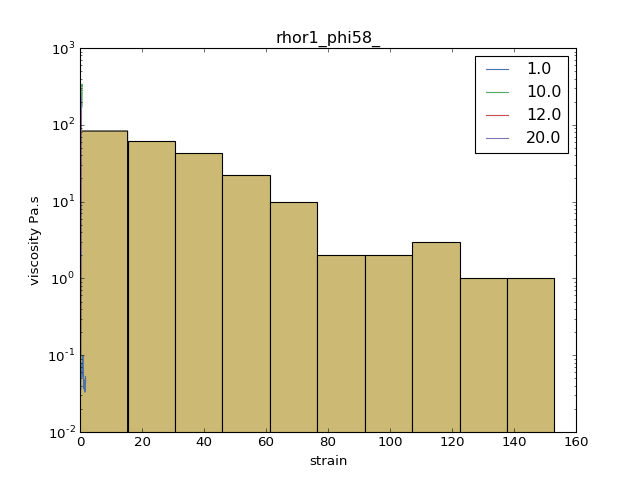

In [440]:
# compare(54,[20, 30, 50])
compare(56,[10,12,14,20])
compare(58,[1,10,12,20])

In [423]:
def plot_hist(phival, ydvals,bin_num=20,xyscale=[[0,5],[0,5]]):
    plt.figure(figsize=[13,5*(1+len(ydvals)/2)])
    plt.title("phival = "+str(phival))
    j = len(ydvals)
    for i,shearrate in enumerate(ydvals):
#         plt.figure(figsize=[10,10]) # uncomment to plot each plot separately, not as subplots
        try:
            plt.subplot(int(j/2.0)+1,2,i+1)
            exp = reader.DataSet("rhor1_phi"+str(phival)+"_yd"+str(float(shearrate)))
            exp.load_state(exp.tlist[-1])

            max_strain = float(exp.t)*exp.shearrate*exp.dt
            print max_strain
            n = len(exp.tlist[1:])
            if max_strain >= 1:
                n_last_strain = int(float(n)/max_strain)
                
            else:
                n_last_strain = -30

#             n_last_strain = 50
            f = "rhor1_phi"+str(phival)+"_yd"+str(float(shearrate))+"/result/nu_t.dat"
            db = pd.read_csv(f)
            nu = db[db.columns[2]][n_last_strain:]
            nu_rel = db[db.columns[4]][n_last_strain:]
            
            #==============================================
#             nu_rel = nu_rel/max(nu_rel) # normalize everything
            #==============================================

            hist, bin_edges = np.histogram(np.log10(nu_rel),bin_num, density=False)

#             hist = ss.relfreq(nu_rel,numbins=bin_num)
#             hist = hist.frequency*100.0
            hist = hist/float(len(nu))*100
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
            plt.step(bin_centers,hist,label="yd="+str(shearrate))
            """
            x = []
            for i in range(len(bin_edges)-1):
                x.append((bin_edges[i]+bin_edges[i+1])/2.0)
            x = np.log10(x)
            poly_fit_hist = np.poly1d(np.polyfit(x, hist, 30))
            """
#             plt.plot(x,hist,'-g',label="yd="+str(shearrate)+" histogram")
#             plt.plot(x,poly_fit_hist(x),'r',label="yd="+str(shearrate)+" polyfit")
#             plt.hist(np.log10(nu_rel), bin_num,alpha=0.1,label="yd="+str(shearrate))
            
            plt.ylim(xyscale[1])
            plt.xlim(xyscale[0])
        except Exception as e:
            print e
            continue
        
#         plt.xlim([0,6000])
        plt.title("$\phi$ = "+str(phival))
#         plt.xlabel(" relative viscosity")
        plt.xlabel("log10 relative viscosity")
        plt.ylabel("percentage of datapoints in time series\nwith corresponding viscosity")
#         plt.xscale("log")
#         plt.yscale("log")
        plt.legend()

<IPython.core.display.Javascript object>


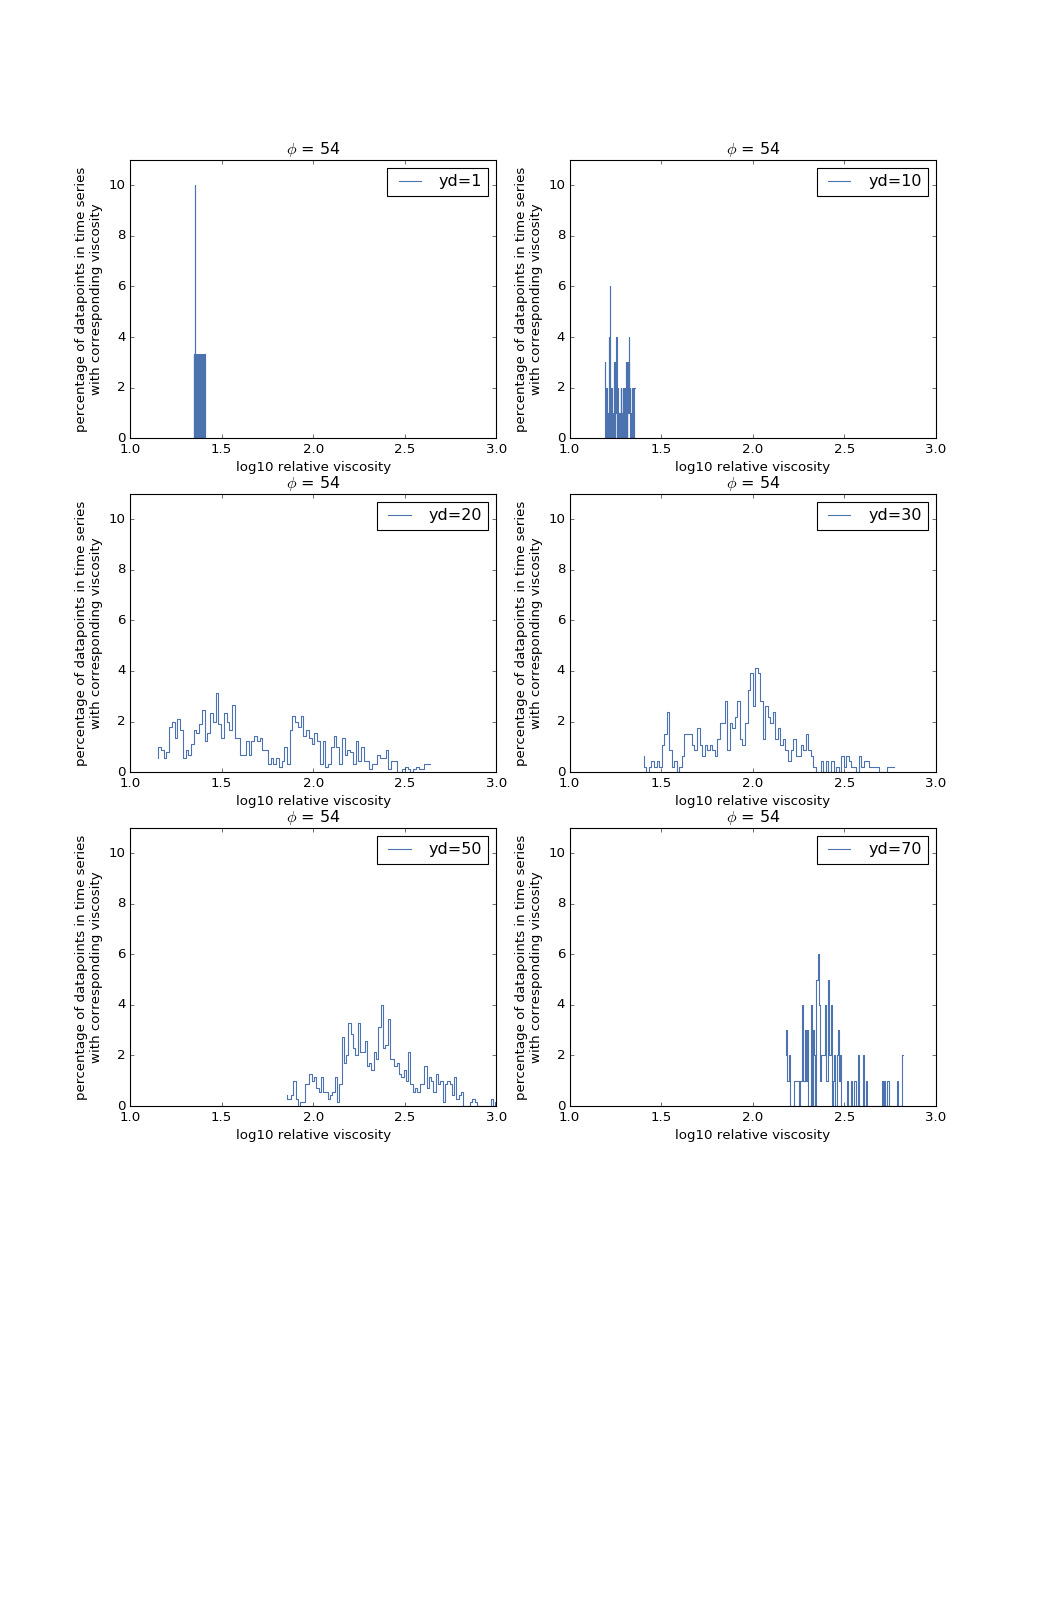

0.323999999999
2.00000166334
10.0000033267
5.60000499001
8.00000831668
2.00000665336


<IPython.core.display.Javascript object>


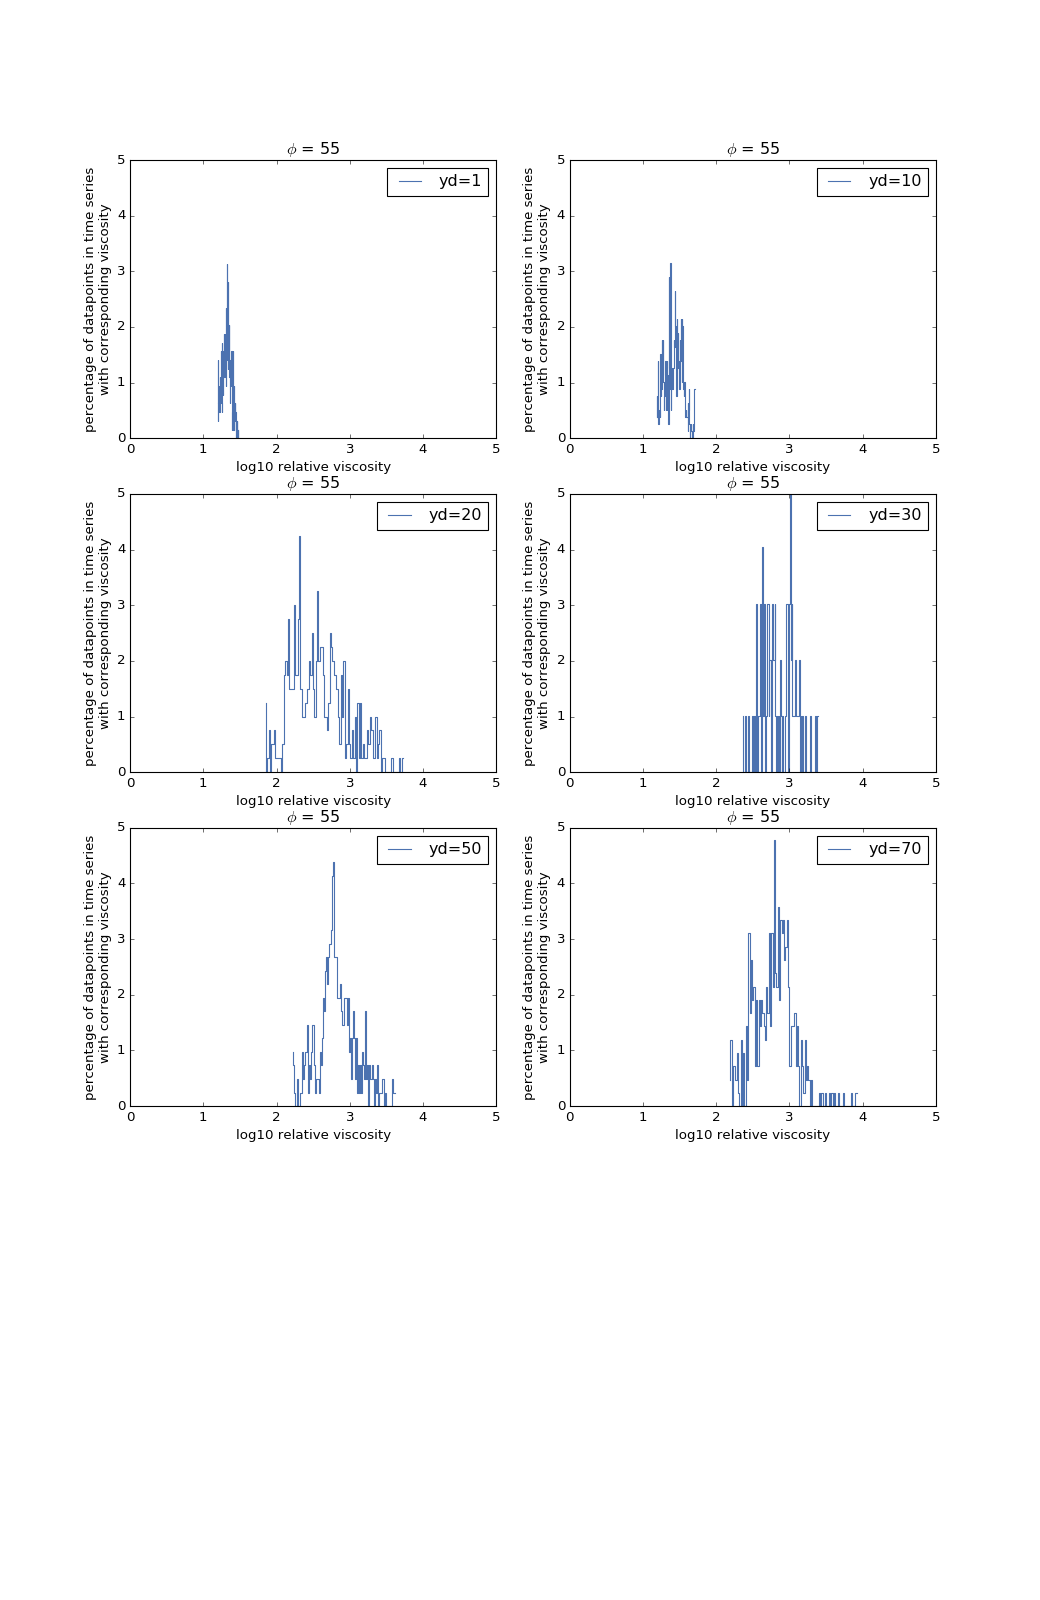

7.40999999999
4.96499999999
5.00000332667
2.0
5.11829673984
5.19086327344


In [414]:
plot_hist(54,[1,10,20,30,50,70],100,[[1,3],[0,11]])
plot_hist(55,[1,10,20,30,50,70],100)

<IPython.core.display.Javascript object>


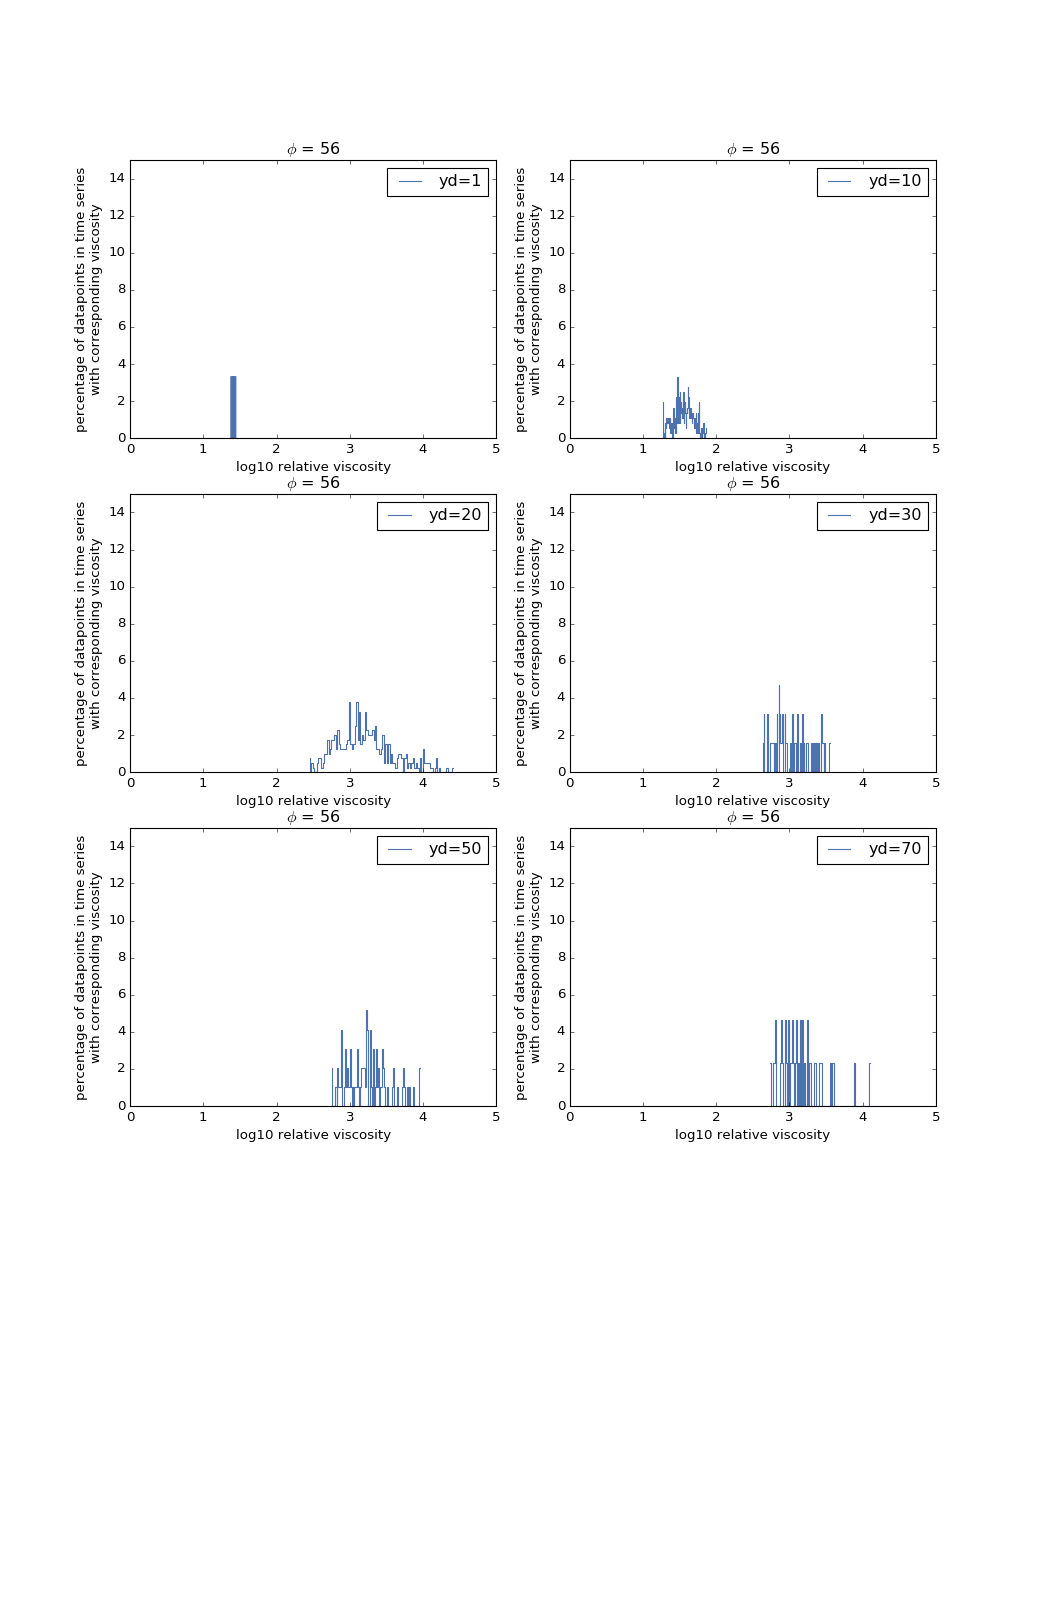

0.384999999999
4.62999999999
4.99999999999
1.65
1.97934131736
2.52


In [408]:
# plot_hist(56,[1,10,20,30,50,70],100)

<IPython.core.display.Javascript object>


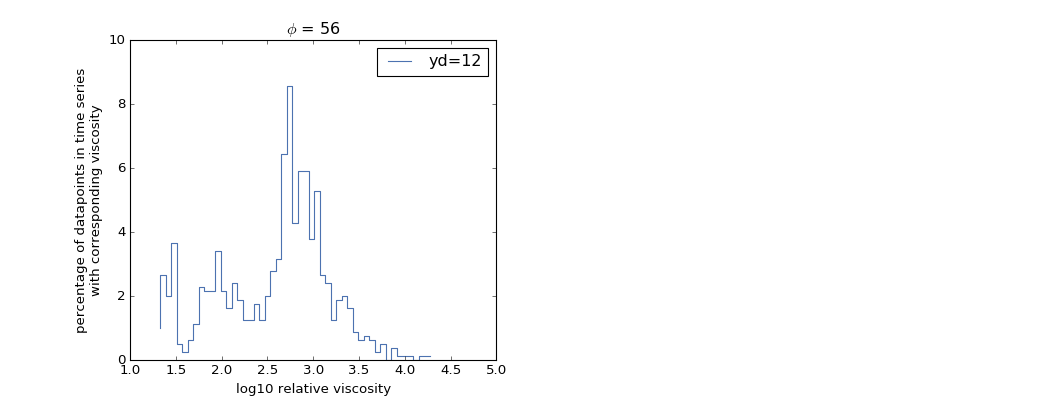

9.00999999998


In [439]:
plot_hist(56,[12],50,[[1,5],[0,10]])

<IPython.core.display.Javascript object>


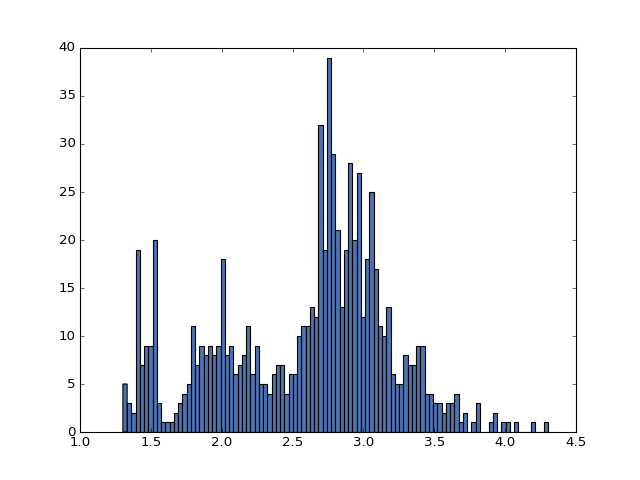

(array([  5.,   3.,   2.,  19.,   7.,   9.,   9.,  20.,   3.,   1.,   1.,
          1.,   2.,   3.,   4.,   5.,  11.,   7.,   9.,   8.,   9.,   8.,
          9.,  18.,   8.,   9.,   6.,   7.,   8.,  11.,   6.,   9.,   5.,
          5.,   4.,   6.,   7.,   7.,   4.,   6.,   6.,  10.,  11.,  11.,
         13.,  12.,  32.,  19.,  39.,  29.,  21.,  13.,  19.,  28.,  20.,
         27.,  12.,  18.,  25.,  17.,  11.,  10.,  13.,   6.,   5.,   5.,
          8.,   7.,   7.,   9.,   9.,   4.,   4.,   3.,   3.,   2.,   3.,
          3.,   4.,   1.,   2.,   0.,   1.,   3.,   0.,   0.,   1.,   2.,
          0.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.]),
 array([ 1.30265689,  1.33265586,  1.36265482,  1.39265379,  1.42265275,
         1.45265172,  1.48265069,  1.51264965,  1.54264862,  1.57264758,
         1.60264655,  1.63264551,  1.66264448,  1.69264344,  1.72264241,
         1.75264137,  1.78264034,  1.8126393 ,  1.84263827,  1.87263723,
         1.9026362 ,  1.93

In [433]:
f = 'rhor1_phi56_yd12.0/result/nu_t.dat'
db =pd.read_csv(f)
nu = db[db.columns[2]]
nu_rel = db[db.columns[4]]

nu_rel=nu_rel[100:]
nu_rel = np.log10(nu_rel)
plt.figure()
plt.hist(nu_rel, bins=100,)

<IPython.core.display.Javascript object>


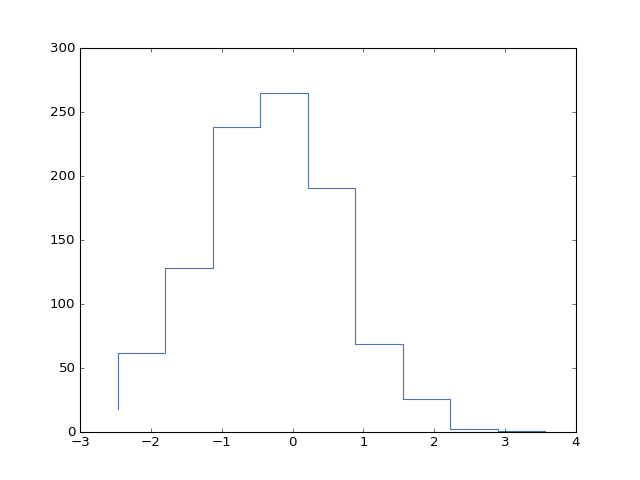

In [411]:
plt.figure()
data = np.random.normal(size=1000)

# Generate the histogram data directly
hist, bin_edges = np.histogram(data, bins=10)

# Get the reversed cumulative sum
hist_neg_cumulative = [np.sum(hist[i:]) for i in range(len(hist))]

# Get the cin centres rather than the edges
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.

# Plot
plt.step(bin_centers, hist)

plt.show()

In [645]:


class Stress_distribution_Analysis():
    def __init__(self,path,):
        self.path = path
        self.y = []
        self.exp = reader.DataSet(self.path, fluid=False, particles=True)
        self.exp.load_state(self.exp.tlist[-1])
        self.strain = self.exp.tlist[-1]*self.exp.shearrate*exp.dt
        self.range = int(len(self.exp.tlist)/float(self.strain))
        
    def analyze(self,trange='None'):
        if (trange == 'None') and (self.strain > 1):
            trange =  self.range
        if (self.strain < 1):
            trange = 10
            print "less than one strain"
            
        for t in self.exp.tlist[trange:]:
            self.exp.load_state(t)
            x  = self.exp.particles.sshear_tot
            x = [np.linalg.norm(i) for i in x]
            self.y.extend(x)
    def plot(self, bins='fd',scale="linear"):
#         plt.figure()
        hist, bin_edges = np.histogram(np.log10(self.y),bins)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
        hist = hist/float(len(self.y))*100
        plt.step(bin_centers, hist)
        plt.xscale(scale)
        plt.xlim([-2,4.5])
        plt.ylim([0,5])
        plt.xlabel("log10 Shear Stresses in particles (Pa)")
        plt.ylabel("Percent of the system in the corresponding State")
        plt.title("Histogram of stresses in "+self.path+" over multiple time steps")
        plt.show()


<IPython.core.display.Javascript object>


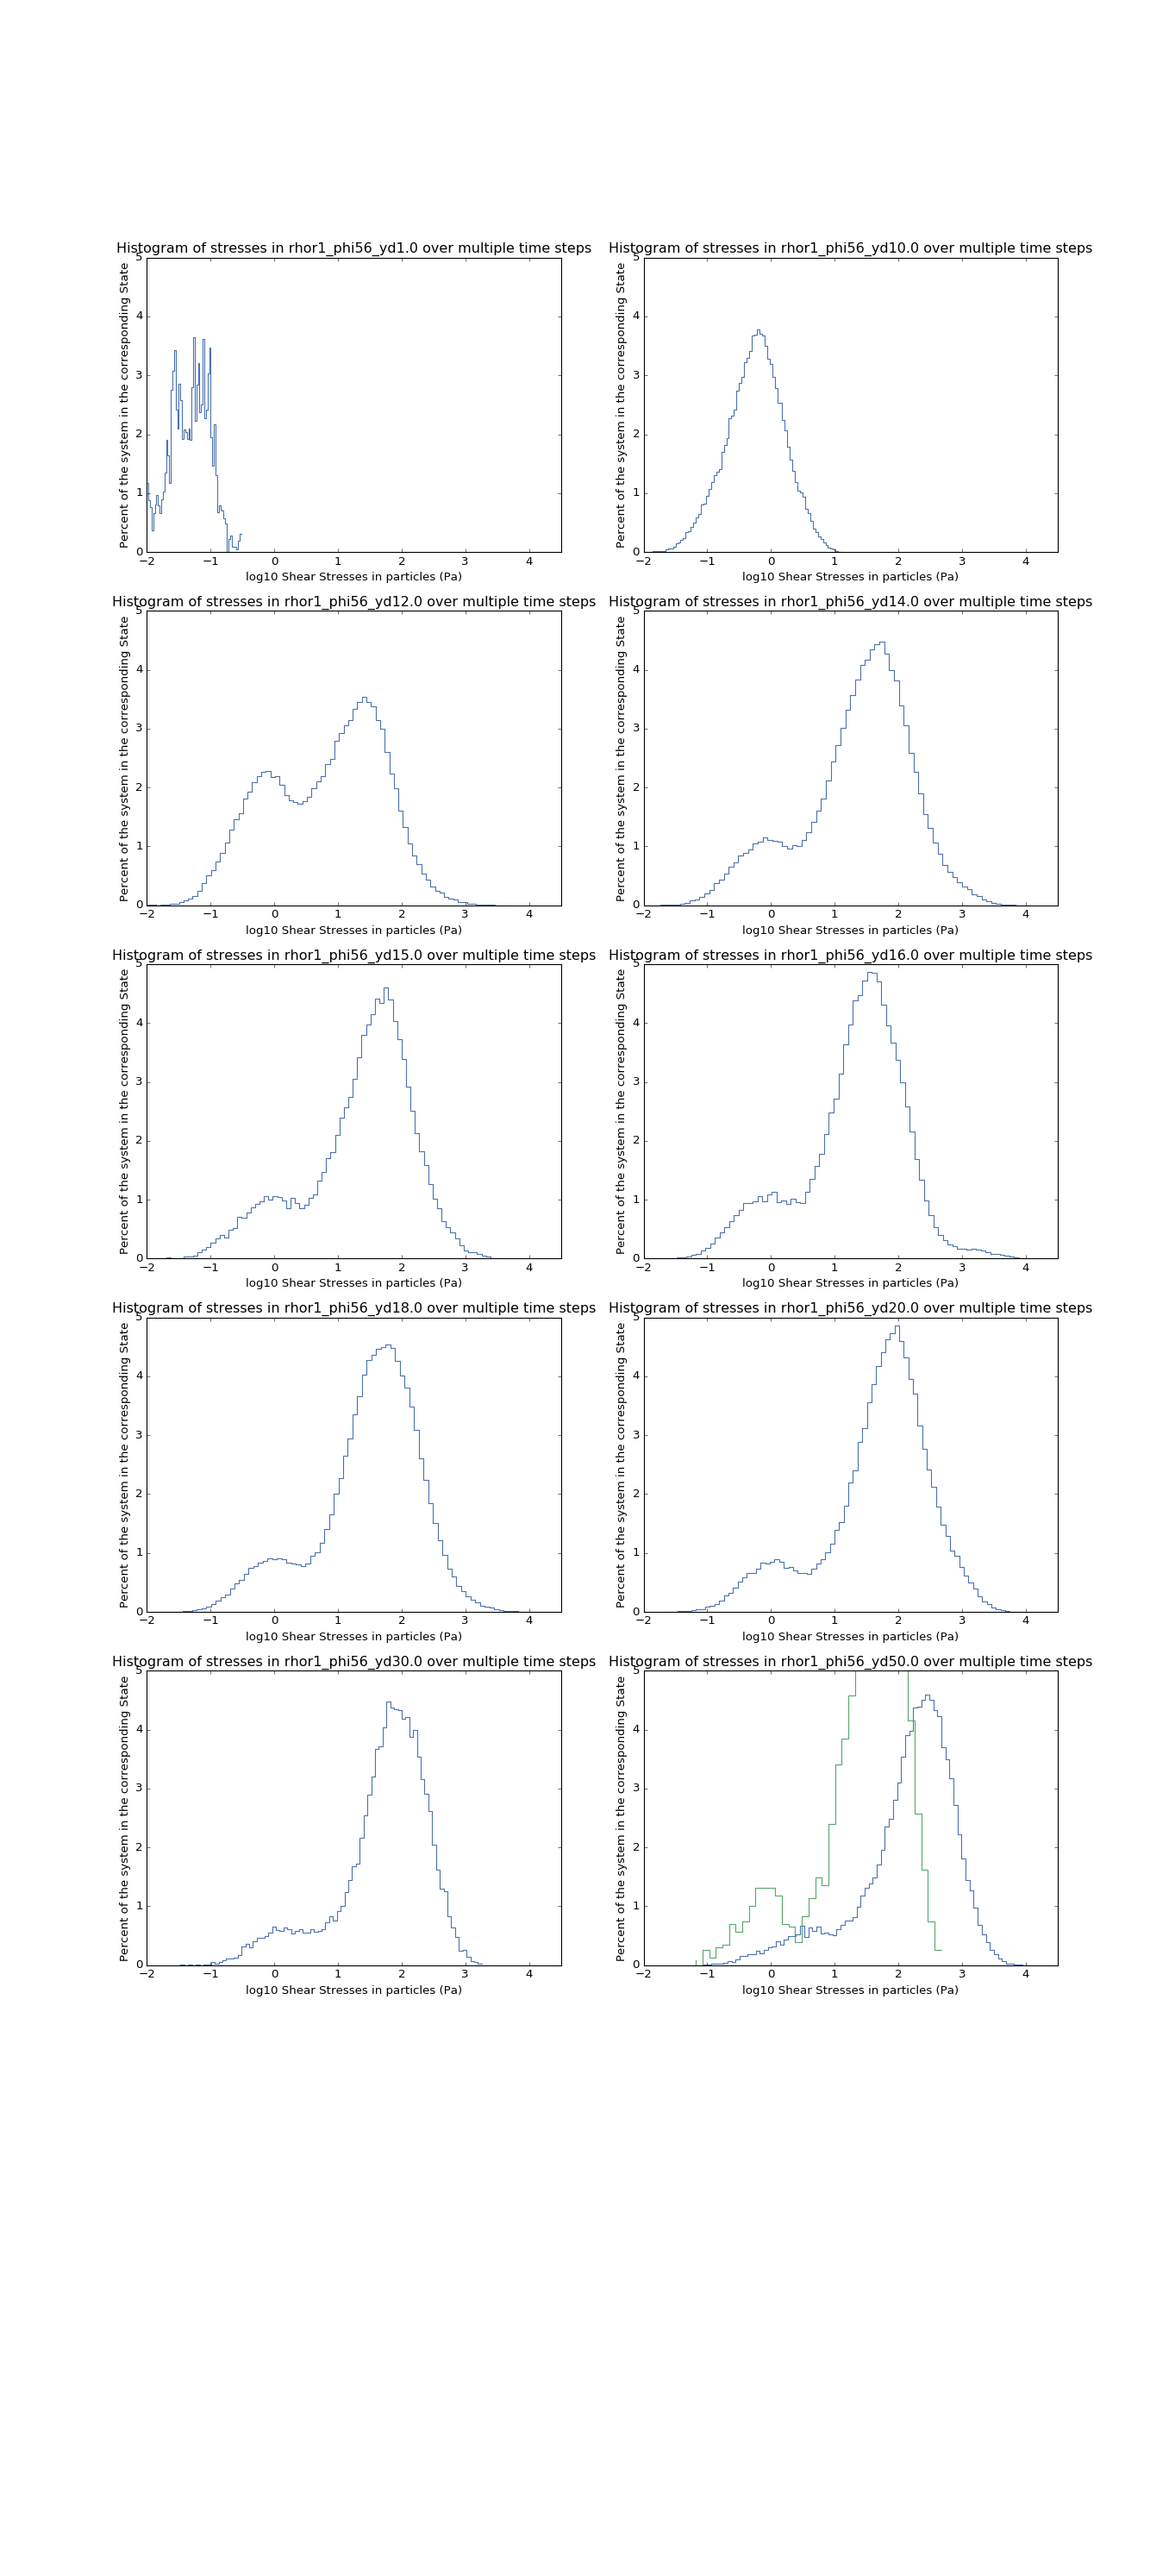

less than one strain
0.0 % complete
10.0 % complete
20.0 % complete
30.0 % complete
40.0 % complete
50.0 % complete
60.0 % complete
70.0 % complete
80.0 % complete
90.0 % complete


In [600]:
path_list = [ 'rhor1_phi56_yd1.0','rhor1_phi56_yd10.0','rhor1_phi56_yd12.0',\
              'rhor1_phi56_yd14.0','rhor1_phi56_yd15.0','rhor1_phi56_yd16.0',\
              'rhor1_phi56_yd18.0','rhor1_phi56_yd20.0','rhor1_phi56_yd30.0',\
              'rhor1_phi56_yd50.0']
plt.figure(figsize=[13,5*(1+len(path_list)/2)])
for i,path in enumerate(path_list):
    plt.subplot(int(len(path_list)/2.0)+1,2,i+1)
    StressAnalysis_56 = Stress_distribution_Analysis(path)
    StressAnalysis_56.analyze()
    StressAnalysis_56.plot(bins=80)
    print i/float(len(path_list))*100 , "% complete"

<IPython.core.display.Javascript object>


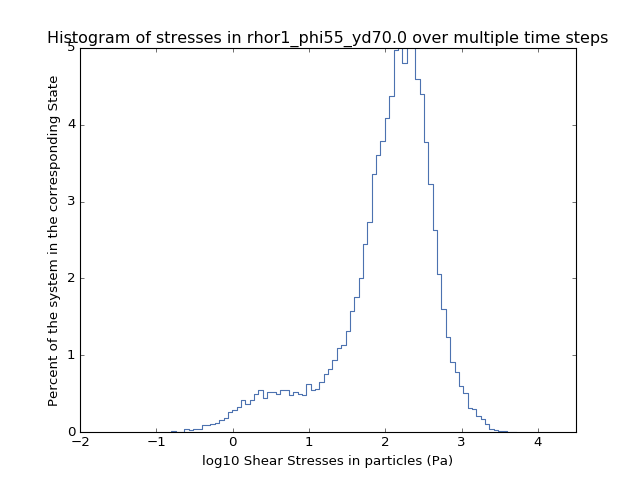

In [652]:
x = Stress_distribution_Analysis('rhor1_phi55_yd70.0')
x.analyze(trange=-100)
plt.figure()
x.plot(bins=80)